In [1]:
import struct
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

In [2]:
def load_data_images(fname):
    path = "/Users/dikshachand/Documents/Applied ML/HW1/mnist/"+fname+"-ubyte.gz"

    data = None

    with gzip.open(path, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
        data = data.reshape((size, nrows, ncols))
        data = data.reshape(data.shape[0], (data.shape[1]*data.shape[2]))

    print(fname, data.shape)
    return data

properties_2016 = pd.read_csv('../zillow/properties_2016.csv')
train_2016 = pd.read_csv('../zillow/train_2016.csv')
properties_2017 = pd.read_csv('../zillow/properties_2017.csv')
train_2017 = pd.read_csv('../zillow/train_2017.csv')

In [3]:
def load_data_labels(fname):
    path = "/Users/dikshachand/Documents/Applied ML/HW1/mnist/"+fname+"-ubyte.gz"

    data = None

    with gzip.open(path, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))

    print(fname, data.shape)
    return data

train-images-idx3 (60000, 784)
shape after flattening: (60000, 784)
train-labels-idx1 (60000,)
t10k-images-idx3 (10000, 784)
shape after flattening: (10000, 784)
t10k-labels-idx1 (10000,)


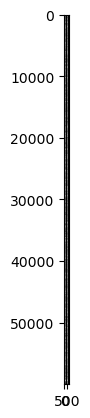

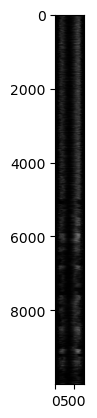

In [4]:
X_train = load_data_images('train-images-idx3')
print("shape after flattening:",X_train.shape)

y_train = load_data_labels('train-labels-idx1')

X_test = load_data_images('t10k-images-idx3')
print("shape after flattening:",X_test.shape)

y_test = load_data_labels('t10k-labels-idx1')

plt.imshow(X_train[:,:], cmap='gray')
plt.show()
plt.imshow(X_test[:,:], cmap='gray')
plt.show()

In [5]:
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

BernoulliNB()

In [6]:
y_pred_nb = nb_model.predict(X_test)
nb_accuracy_test = accuracy_score(y_test, y_pred_nb)
nb_confusion_matrix_test = confusion_matrix(y_test, y_pred_nb)

y_pred_nb = nb_model.predict(X_train)
nb_accuracy_train = accuracy_score(y_train, y_pred_nb)
nb_confusion_matrix_train = confusion_matrix(y_train, y_pred_nb)

In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/Users/dikshachand/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred_lr = lr_model.predict(X_test)
lr_accuracy_test = accuracy_score(y_test, y_pred_lr)
lr_confusion_matrix_test = confusion_matrix(y_test, y_pred_lr)

y_pred_lr = lr_model.predict(X_train)
lr_accuracy_train = accuracy_score(y_train, y_pred_lr)
lr_confusion_matrix_train = confusion_matrix(y_train, y_pred_lr)

In [9]:
pickle.dump(nb_model, open('/Users/dikshachand/Documents/Applied ML/HW1/nb.model', 'wb'))
pickle.dump(lr_model, open('/Users/dikshachand/Documents/Applied ML/HW1/lr.model', 'wb'))

In [10]:
print("Naive Bayes Confusion Matrix (Test Data): \n", nb_confusion_matrix_test)
print("Accuracy: ", nb_accuracy_test)
print("\nNaive Bayes Confusion Matrix (Train Data): \n", nb_confusion_matrix_train)
print("Accuracy: ", nb_accuracy_train)

print("\n\nLogistic Regression Confusion Matrix (Test Data): \n", lr_confusion_matrix_test)
print("Accuracy: ", lr_accuracy_test)
print("\nLogistic Regression Confusion Matrix (Train Data): \n", lr_confusion_matrix_train)
print("Accuracy: ", lr_accuracy_train)

Naive Bayes Confusion Matrix (Test Data): 
 [[ 887    0    4    7    2   41   16    1   22    0]
 [   0 1085   10    5    0    9    6    0   19    1]
 [  19    8  852   29   17    4   32   14   55    2]
 [   5   15   34  844    0   13    9   15   49   26]
 [   2    6    4    0  795    4   21    1   23  126]
 [  23   12    7  129   30  627   16    8   21   19]
 [  18   18   15    2   13   35  851    0    6    0]
 [   1   24   14    4   15    0    0  871   27   72]
 [  16   23   13   76   17   22    7    6  758   36]
 [   9   13    5    9   74    8    0   24   24  843]]
Accuracy:  0.8413

Naive Bayes Confusion Matrix (Train Data): 
 [[5273    3   26   38   16  283  114    0  161    9]
 [   0 6457   59   16    4   70   26    4   90   16]
 [  93   86 4913  149  128   19  232   60  261   17]
 [  56  138  275 4871   19  148   54   74  309  187]
 [  13   52   38    0 4693   29   89   28  124  776]
 [ 158   72   53  805  161 3763  118   23  108  160]
 [  60  158  119    2   47  170 5318    0  

Logistic Regression model provides a greater accuracy than the Naive Bayes model.
I observe that there is a similarity in the results of confusion matrices of performace on test data and train data, for each model. This means that the model is generalising well overall.
There are a few classes that each model is predicting with least error. For example, the Naive Bayes model seems to be good at classifying 7's and comparitively poor at 8's. And, the Logistic regression model performs well with correctly classifying 1's and poorly for 8's. It could be true that the data is not equally weighted for each of the classes (digits from 0 to 9).